# UAS Computer Vision, Juli 2022

##  <font color="green"> Ini adalah sebagian dari soal UAS. Sebagian yang lain sudah dikerjakan di atas kertas di kampus.</font>


## Pertama-tama, ganti NIM di nama file ini. Klik <font color="red">File -> Rename... </font>

Lalu isi yang di bawah ini. Untuk mengedit cell ini, double-click di sini.
### NAMA: Yusuf Tis'a Doni
### NIM: A710190084

In [1]:
from time import ctime
from os import getcwd
import sys
nama = "Yusuf Tis;a Doni"        ## Ganti dengan namamu
NIM = "A710190084"        ## Ganti dengan NIM-mu
kota = "Surakarta"        ## Ganti dengan kotamu
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)

NAMA: Yusuf Tis;a Doni
NIM : A710190084
Kota: Surakarta
Fri Jul 15 15:43:19 2022

C:\Users\dynam\OneDrive - thapar institute of engineering & technology\Documents\Kuliah\Kuliah\Semester 6\Computer Vision\UAS\UAS_ComVis_A_Juli_2022
C:\Users\dynam\AppData\Local\Programs\Python\Python310\python.exe
3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]


##  Importing the libraries

Juga, kamu wajib setuju dengan syarat dan kondisi di bawah.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, Markdown

cond = "Jika ada tanda-tanda kecurangan, semisal kemiripan jawaban antar mahasiswa di suatu pertanyaan, \
maka hal itu dapat mengakibatkan nilai NOL di SEMUA pertanyaan (tidak peduli siapa yang aslinya mengerjakan). \
Jadi, buat jawabanmu lengkap (sehingga unik dan tidak mirip) dengan memberi comments yang cukup dan jangan \
dibagikan lewat cara apapun."
setuju = "Saya, " + nama.upper() + ", dengan ini bersaksi bahwa saya mengerjakan ujian ini tanpa interaksi \
dengan mahasiswa lain atau orang lain dan saya setuju dengan kondisi yang tertuang di atas."

Markdown('<br><font size="4">{}</font><br><br><font size="5">{}</font>'.format(cond, setuju) )

<br><font size="4">Jika ada tanda-tanda kecurangan, semisal kemiripan jawaban antar mahasiswa di suatu pertanyaan, maka hal itu dapat mengakibatkan nilai NOL di SEMUA pertanyaan (tidak peduli siapa yang aslinya mengerjakan). Jadi, buat jawabanmu lengkap (sehingga unik dan tidak mirip) dengan memberi comments yang cukup dan jangan dibagikan lewat cara apapun.</font><br><br><font size="5">Saya, YUSUF TIS;A DONI, dengan ini bersaksi bahwa saya mengerjakan ujian ini tanpa interaksi dengan mahasiswa lain atau orang lain dan saya setuju dengan kondisi yang tertuang di atas.</font>

In [3]:
Markdown('<br><br><br><br><div align="center"><font size="7">{}</font></div><br><br>'.format(chr(65021) ) )

<br><br><br><br><div align="center"><font size="7">﷽</font></div><br><br>

# 1 

Buka gambar `student_green.png`. Memakai OpenCV, hilangkan latar hijaunya. **Semua perintah harus diberi komentar yang menjelaskan.** 

Tampilkan berdampingan dengan gambar aslinya.


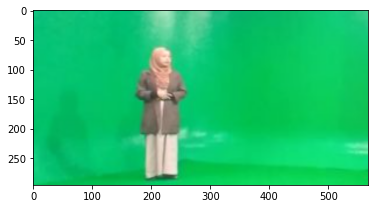

In [33]:
student = cv2.imread("student_green.png")
plt.imshow(student[:,:,::-1])

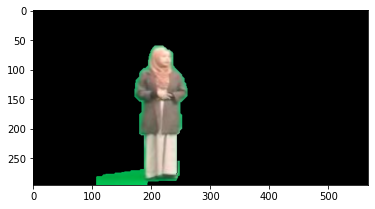

In [61]:
img = cv2.imread('student_green.png')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,300,285)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
imgyusuf = img*mask2[:,:,np.newaxis]

plt.imshow(imgyusuf[:,:,::-1])

# 2

Buat histogram (3 channel) untuk gambar asli dan gambar yang sudah dihilangkan latar belakangnya. Tampilkan berdampingan

Apa perbedaan yang mencolok? Mengapa begitu?

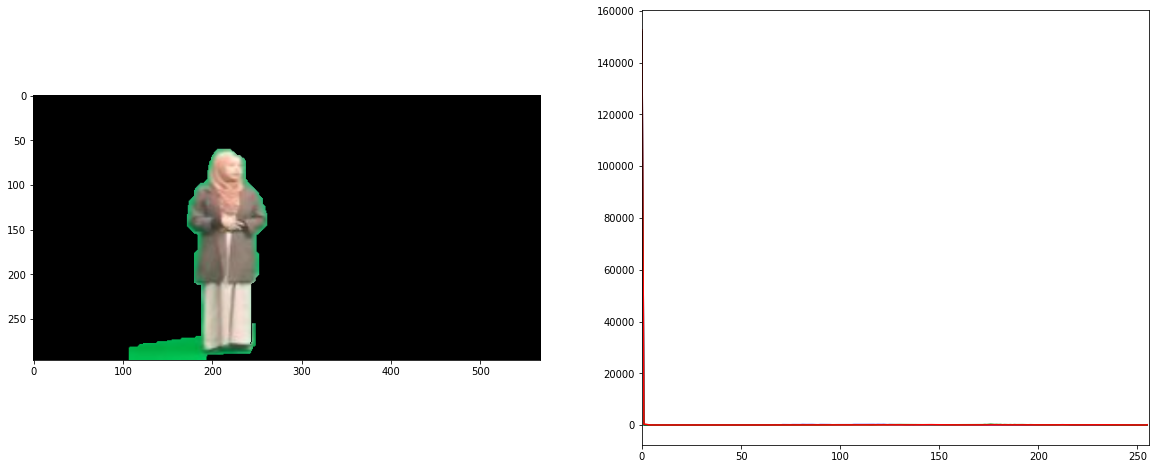

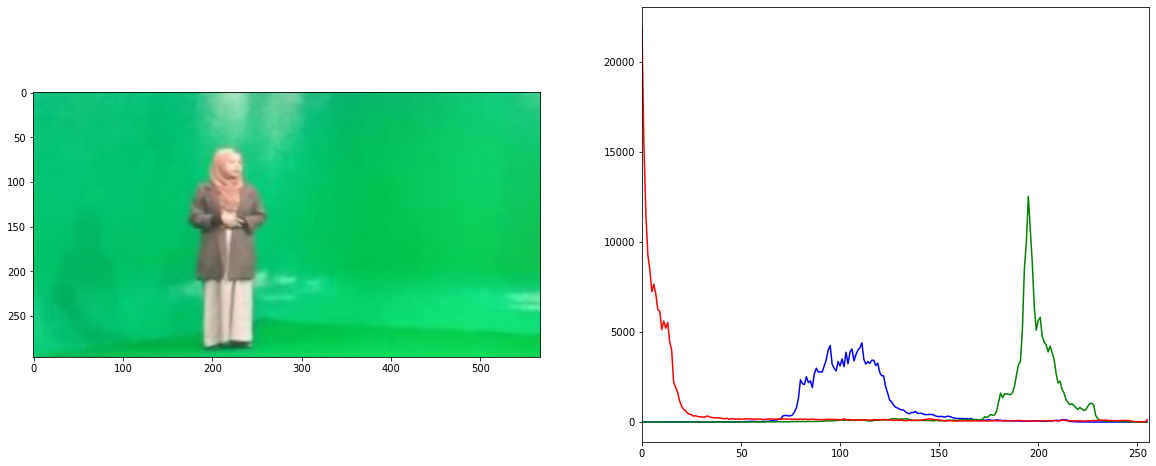

In [62]:
color = ('b','g','r')


plt.figure(figsize=[20,8])
plt.subplot(121); plt.imshow(imgyusuf[:,:,::-1], vmin=0, vmax=255)
plt.subplot(122); 
for i,col in enumerate(color):
    histr = cv2.calcHist([imgyusuf],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

plt.figure(figsize=[20,8])
plt.subplot(121); plt.imshow(img[:,:,::-1], vmin=0, vmax=255)
plt.subplot(122); 
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# 3 

Memakai OpenCV, ganti latar belakang yang tadinya hijau dengan gambar `pantai.jpg`. Sesuaikan ukurannya agar tampak bagus. Semua proses harus memakai OpenCV / numpy. **Semua perintah harus diberi komentar yang menjelaskan.**


Tampilkan berdampingan dengan gambar aslinya.

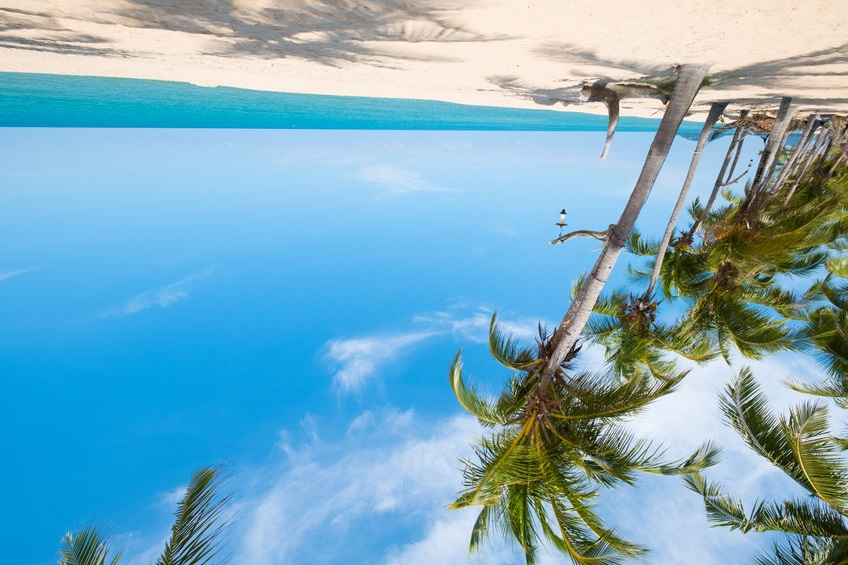

In [68]:
Image("pantai.jpg")

(565, 848, 3)

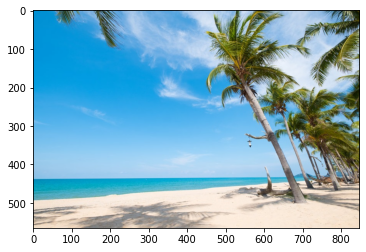

In [69]:
# membaca gambar dengan perintan imread
yusuf = cv2.imread("pantai.jpg")
# membalik gambar dengan perintah cv2.flip
pantai_ok = cv2.flip(yusuf, 0)

plt.imshow(pantai_ok[:,:,::-1])

logo_w = pantai_ok.shape[0]
logo_h = pantai_ok.shape[1]

pantai_ok.shape

(565, 848, 3)


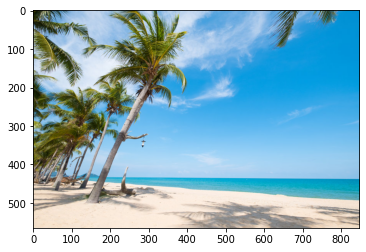

In [39]:
plt.imshow(pantai[:,:,::-1])
print(pantai.shape)

In [78]:
pti = cv2.resize(pantai_ok,None,fx=1.11, fy=1.11)
pti.shape

(627, 941, 3)

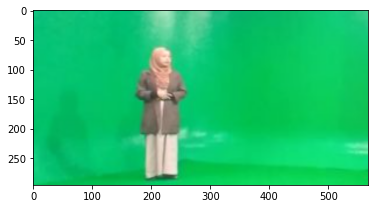

In [72]:
student = cv2.imread("student_green.png")
plt.imshow(student[:,:,::-1])

(296, 568)


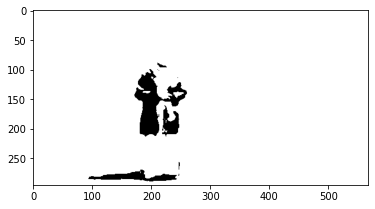

In [73]:
img_gray = cv2.cvtColor(student, cv2.COLOR_RGB2GRAY)
retval, img_mask = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

plt.imshow(img_mask,cmap="gray")
print(img_mask.shape)

In [75]:
student_ok = cv2.resize(img_mask,None,fx=1.11, fy=1.11)
student_ok.shape

(329, 630)

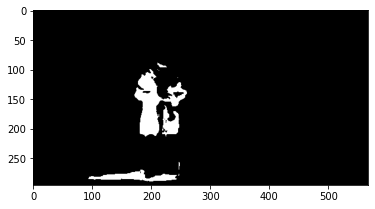

In [79]:
img_mask_inv = cv2.bitwise_not(img_mask)

plt.imshow(img_mask_inv, cmap="gray")

In [80]:
pn_mid = pti[60:500-61,:,:]
pn_mid.shape

(379, 941, 3)

In [81]:
img_background = cv2.bitwise_and(pn_mid, pn_mid, mask=img_mask)
plt.imshow(img_background[:,:,::-1])

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


# 4

Buat histogram (3 channel) untuk gambar asli, gambar yang sudah dihilangkan latar belakangnya, serta gambar yang sudah berlatar pantai. Tampilkan ketiganya berdampingan

Apa perbedaan yang mencolok? Mengapa begitu?

## Click Kernel  -->  Restart & Run All

## Save

## Add, commit, then push to GitHub